
# A Gaussian integral

Using MonteCarlo integration, check that:

$$\int_{0}^{+\infty} x^3 exp\left( -\frac{x^2}{2\sigma^2}\right) dx = 2\sigma^4$$

1. Does the result converge with the number of samples? And how does the error go down?
2. Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at length later on, but for now try to fit it by hand with a parametrized model. (If $N$ is large enough you should get something that looks very accurate! And if $N$ is small?)
3. How does the distribution change if $N$ increases?

The Monte Carlo integration rule states that:

$$\int f(x)p(x)dx \approx \frac{1}{N}\sum_{i=1}^{N}f(x_i)$$

For $p(x)$, starting from the definition of Gaussian used in np.random.uniform(), we know that:

$$\int_{-\infty}^{+\infty} \frac{1}{\sqrt{2\pi\sigma^2}} exp\left( -\frac{x^2}{2\sigma^2}\right) dx = 1$$

And thus:

$$2\int_{0}^{+\infty} \frac{1}{\sqrt{2\pi\sigma^2}} exp\left( -\frac{x^2}{2\sigma^2}\right) dx = 1 \longrightarrow \sqrt{\frac{2}{\pi\sigma^2}}\int_{0}^{+\infty} exp\left( -\frac{x^2}{2\sigma^2}\right) dx = 1$$

We can then write: 

$$\int_{0}^{+\infty} x^3 exp\left( -\frac{x^2}{2\sigma^2}\right) dx = \int_{0}^{+\infty} \left(x^3 \sqrt{\frac{\pi}{2}}\sigma\right) \left(\sqrt{\frac{2}{\pi\sigma^2}} exp\left( -\frac{x^2}{2\sigma^2}\right)\right) dx$$

Therefore, we obtain:

$$f(x) = x^3 \sqrt{\frac{\pi}{2}}\sigma$$

In [2]:
# Fixed sigma, fixed N

import numpy as np
import matplotlib.pyplot as plt

N = 1000000
sigma = 1

# I need a f(x) to EVALUATE and a p(x) to SAMPLE, with p(x) that integrates to 1.

def HalfGaussian(loc, scale, size):
    samples = np.random.normal(loc=loc, scale=scale, size=size)
    return abs(samples)

# Defining f(x):
def Funcf(loc, scale, size):
    points = HalfGaussian(loc=loc, scale=scale, size=size)
    return points**3 * (np.sqrt(np.pi/2)*scale)

integral = np.mean(Funcf(0, sigma, N))

print('N: ' + str(N))
print('Integral: ' + str(integral))
print('True value: ' + str(2*sigma**4))
print('Relative error: ' + '{:.2e}'.format(abs(integral-2*sigma**4)/integral))

N: 1000000
Integral: 2.002943572062211
True value: 2
Relative error: 1.47e-03


N: 1000000

Sigma: 0.1
Integral: 0.00020014242005419439
True value: 0.00020000000000000004
Relative error: 7.12e-04

Sigma: 0.2
Integral: 0.003206349903972362
True value: 0.0032000000000000006
Relative error: 1.98e-03

Sigma: 0.3
Integral: 0.016197554952119924
True value: 0.0162
Relative error: 1.51e-04

Sigma: 0.4
Integral: 0.05116941632142568
True value: 0.05120000000000001
Relative error: 5.98e-04

Sigma: 0.5
Integral: 0.12468647252745574
True value: 0.125
Relative error: 2.51e-03

Sigma: 1.0
Integral: 1.9981840404088418
True value: 2.0
Relative error: 9.09e-04

Sigma: 2.0
Integral: 32.05170756696792
True value: 32.0
Relative error: 1.61e-03

Sigma: 5.0
Integral: 1249.5108290517987
True value: 1250.0
Relative error: 3.91e-04

Sigma: 10.0
Integral: 19904.890341336264
True value: 20000.0
Relative error: 4.78e-03

Sigma: 20.0
Integral: 320145.8560894141
True value: 320000.0
Relative error: 4.56e-04

Sigma: 50.0
Integral: 12500599.559164362
True value: 12500000.0
Relative error: 4.80e-0

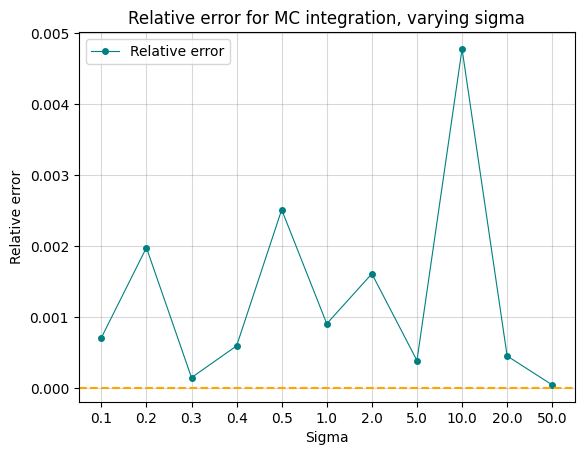

In [3]:
# Varying sigma, fixed N

N = 1000000
S = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 5, 10, 20, 50])

print('N: ' + str(N) + '\n')

integral = np.empty(len(S))
true_value = np.empty(len(S))
rel_err = np.empty(len(S))

for i, sigma in enumerate(S):

    integral[i] = np.mean(Funcf(0, sigma, N))
    true_value[i] = 2*sigma**4
    rel_err[i] = abs(integral[i]-true_value[i])/integral[i]

    print('Sigma: ' + str(sigma))
    print('Integral: ' + str(integral[i]))
    print('True value: ' + str(true_value[i]))
    print('Relative error: ' + '{:.2e}'.format(rel_err[i]) + '\n')

# Using evenly spaced x ticks to get a feeling of the errors, NOT TO SCALE

plt.plot(np.arange(len(S)), rel_err, lw = 0.8, c = 'teal', marker = 'o', ms = 4, label = 'Relative error')
plt.axhline(0, ls = 'dashed', c = 'orange')
plt.xticks(np.arange(len(S)), S)
plt.xlabel('Sigma')
plt.ylabel('Relative error')
plt.title('Relative error for MC integration, varying sigma')
plt.grid(c='grey', alpha = 0.3)
plt.legend()
plt.show()


True value: 2

N = 1000
Integral: 1.941049950858268
Absolute error: 5.90e-02
Relative error: 3.04e-02

N = 5000
Integral: 2.0208397847714026
Absolute error: 2.08e-02
Relative error: 1.03e-02

N = 10000
Integral: 1.9829332245759455
Absolute error: 1.71e-02
Relative error: 8.61e-03

N = 50000
Integral: 2.043220521996074
Absolute error: 4.32e-02
Relative error: 2.12e-02

N = 100000
Integral: 1.990140075047792
Absolute error: 9.86e-03
Relative error: 4.95e-03

N = 500000
Integral: 1.9959398644295858
Absolute error: 4.06e-03
Relative error: 2.03e-03

N = 1000000
Integral: 2.0070518212752635
Absolute error: 7.05e-03
Relative error: 3.51e-03

N = 2500000
Integral: 2.001154760046454
Absolute error: 1.15e-03
Relative error: 5.77e-04

N = 5000000
Integral: 2.0000706400964066
Absolute error: 7.06e-05
Relative error: 3.53e-05

N = 10000000
Integral: 2.000419087806577
Absolute error: 4.19e-04
Relative error: 2.10e-04



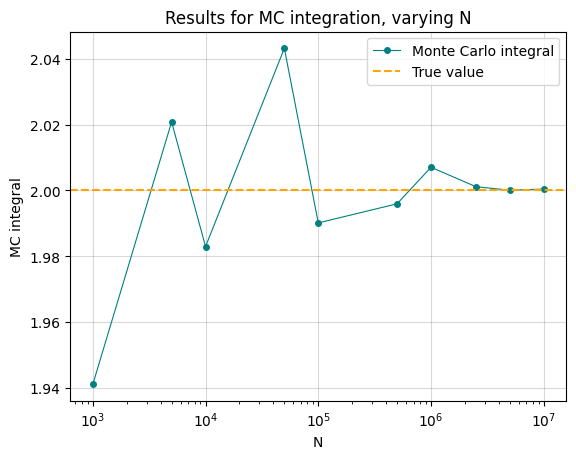

C:\Users\lilit\AppData\Local\Temp\ipykernel_23140\2321768803.py:58: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


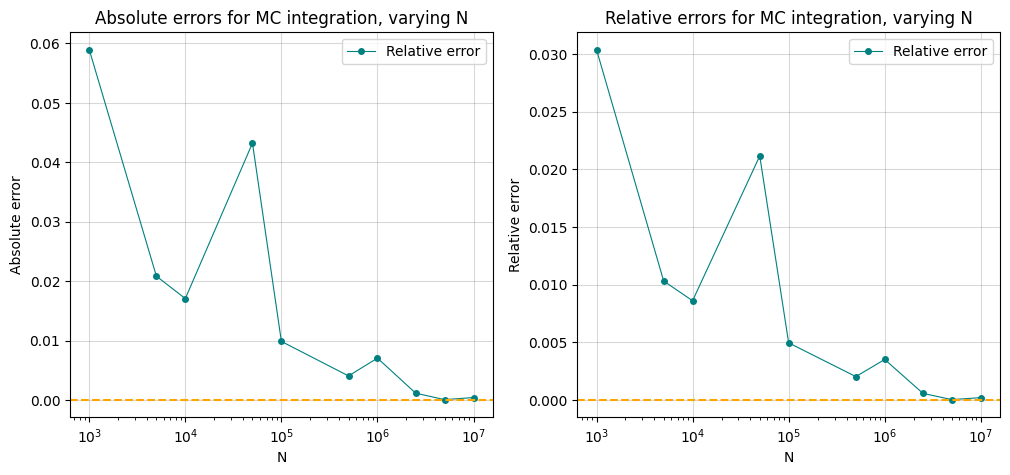

In [4]:
# Fixed sigma, varying N
# "Does the result converge with the number of samples?"

n = np.array([1000, 5000, 10000, 50000, 100000, 500000, 1000000, 2500000, 5000000, 10000000])
sigma = 1

integral = np.empty(len(n))
true_value = 2*sigma**4
abs_err = np.empty(len(n))
rel_err = np.empty(len(n))

print('True value: ' + str(true_value) + '\n')

for i, N in enumerate(n):

    integral[i] = np.mean(Funcf(0, sigma, N))
    abs_err[i] = abs(integral[i]-true_value)
    rel_err[i] = abs(integral[i]-true_value)/integral[i]

    print('N = ' + str(N))
    print('Integral: ' + str(integral[i]))
    print('Absolute error: ' + '{:.2e}'.format(abs_err[i]))
    print('Relative error: ' + '{:.2e}'.format(rel_err[i]) + '\n')

plt.plot(n, integral, lw = 0.8, c = 'teal', marker = 'o', ms = 4, label = 'Monte Carlo integral')
plt.axhline(true_value, ls = 'dashed', c = 'orange', label = 'True value')
plt.xlabel('N')
plt.ylabel('MC integral')
plt.title('Results for MC integration, varying N')
plt.xscale('log')
plt.grid(c='grey', alpha = 0.3)
plt.legend()
plt.show()

# Plotting the absolute and relative errors:
fig, axs = plt.subplots(1, 2, figsize=(12, 5)) 

# For the absolute error:
axs[0].plot(n, abs_err, lw = 0.8, c = 'teal', marker = 'o', ms = 4, label = 'Relative error')
axs[0].axhline(0, ls = 'dashed', c = 'orange')
axs[0].set_xscale('log')
axs[0].set_xlabel('N')
axs[0].set_ylabel('Absolute error')
axs[0].set_title('Absolute errors for MC integration, varying N')
axs[0].grid(c='grey', alpha = 0.3)
axs[0].legend()

# For the relative error:
axs[1].plot(n, rel_err, lw = 0.8, c = 'teal', marker = 'o', ms = 4, label = 'Relative error')
axs[1].axhline(0, ls = 'dashed', c = 'orange')
axs[1].set_xscale('log')
axs[1].set_xlabel('N')
axs[1].set_ylabel('Relative error')
axs[1].set_title('Relative errors for MC integration, varying N')
axs[1].grid(c='grey', alpha = 0.3)
axs[1].legend()

fig.show()

As $N$ increases, the estimated value gets more similar to the true value. Both the absolute error and the relative error converge to zero.

Number of samples = 10000
Number of iterations = 10000
Sigma = 1



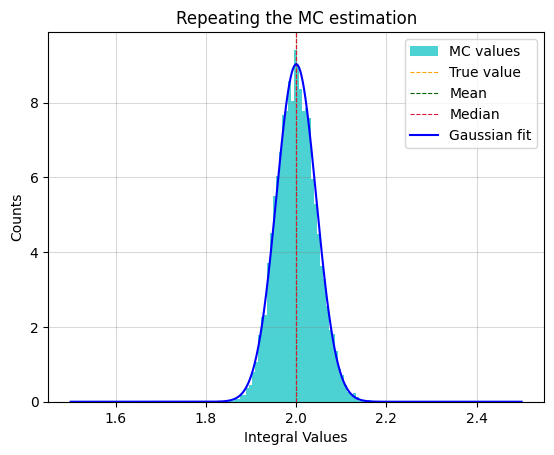

In [5]:
# Fixed sigma, fixed N, repeat the result many times
import scipy.stats

N = 10000     # Number of samples
M = 10000     # Number of MC values
sigma = 1

print('Number of samples = ' + str(N))
print('Number of iterations = ' + str(M))
print('Sigma = ' + str(sigma) + '\n')

integral = np.empty(M)
true_value = 2*sigma**4

for i in np.arange(M):
    integral[i] = np.mean(Funcf(0, sigma, N))

# Using evenly spaced x ticks to get a feeling of the errors, NOT TO SCALE

plt.hist(integral, bins=50, density=True, color = 'c', alpha = 0.7, histtype = 'stepfilled', label = 'MC values')
plt.axvline(true_value, lw = 0.8, ls = 'dashed', c = 'orange', label = 'True value')
plt.axvline(np.mean(integral), lw = 0.8, ls = 'dashed', c = 'darkgreen', label = 'Mean')
plt.axvline(np.median(integral), lw = 0.8, ls = 'dashed', c = 'crimson', label = 'Median')

# Plotting the Gaussian:
gauss = scipy.stats.norm(loc=np.mean(integral), scale=np.std(integral))
x = np.linspace(1.5,2.5,1000)
plt.plot(x, gauss.pdf(x), c = 'blue', label='Gaussian fit')

plt.xlabel('Integral Values')
plt.ylabel('Counts')
plt.title('Repeating the MC estimation')
plt.grid(c='grey', alpha = 0.3)
plt.legend()
plt.show()


For each N value (number of samples), the MC estimation is repeated 10000 times
Sigma: 1
True value: 2



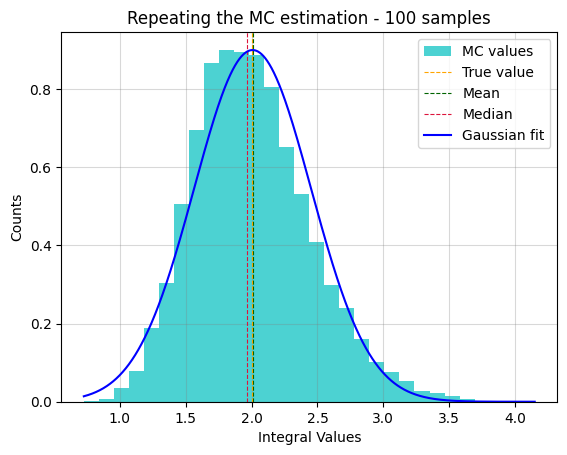

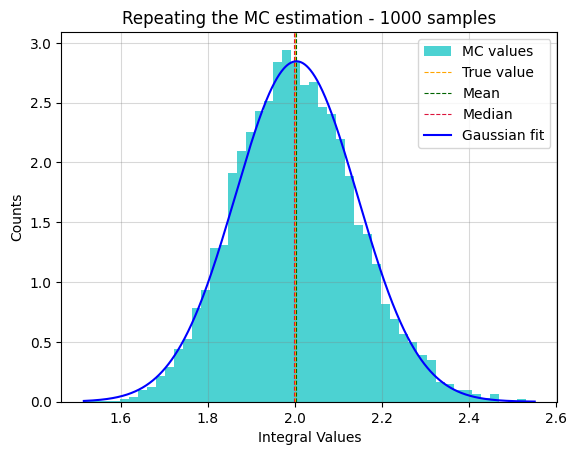

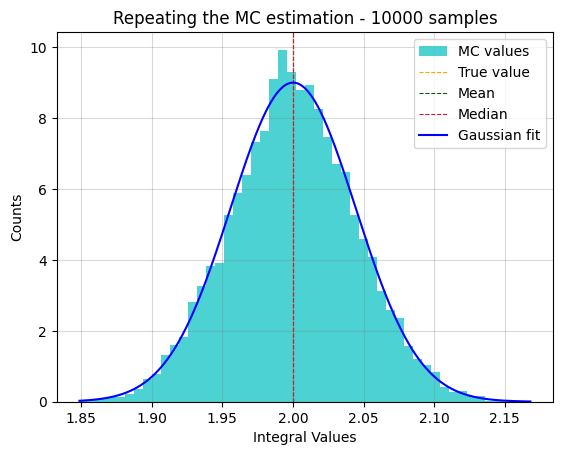

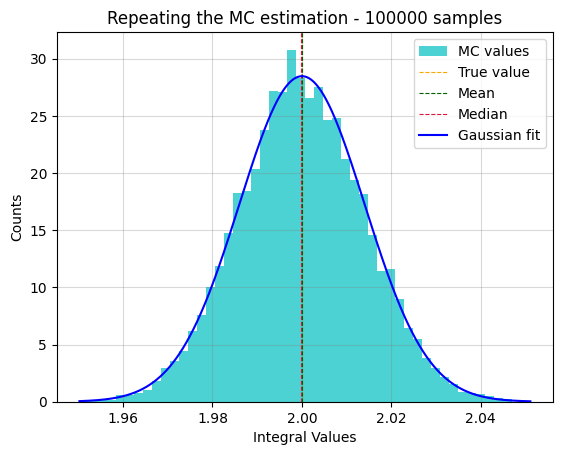

In [6]:
n = np.array([100, 1000, 10000, 100000])     # Number of samples
M = 10000     # Number of MC values
sigma = 1

integral = np.empty(M)
true_value = 2*sigma**4

print('For each N value (number of samples), the MC estimation is repeated ' + str(M) + ' times')
print('Sigma: ' + str(sigma))
print('True value: ' + str(true_value) + '\n')

for N in n:

    for i in np.arange(M):
        integral[i] = np.mean(Funcf(0, sigma, N))
    
    # Using evenly spaced x ticks to get a feeling of the errors, NOT TO SCALE

    if(N == 100):
        plt.hist(integral, bins=30, density=True, color = 'c', alpha = 0.7, histtype = 'stepfilled', label = 'MC values')
    else:
        plt.hist(integral, bins=50, density=True, color = 'c', alpha = 0.7, histtype = 'stepfilled', label = 'MC values')
    plt.axvline(true_value, lw = 0.8, ls = 'dashed', c = 'orange', label = 'True value')
    plt.axvline(np.mean(integral), lw = 0.8, ls = 'dashed', c = 'darkgreen', label = 'Mean')
    plt.axvline(np.median(integral), lw = 0.8, ls = 'dashed', c = 'crimson', label = 'Median')
    
    # Plotting the Gaussian:
    gauss = scipy.stats.norm(loc=np.mean(integral), scale=np.std(integral))
    x = np.linspace(min(integral), max(integral), 1000)
    plt.plot(x, gauss.pdf(x), c = 'blue', label='Gaussian fit')
    
    plt.xlabel('Integral Values')
    plt.ylabel('Counts')
    plt.title('Repeating the MC estimation - ' + str(N) + ' samples')
    plt.grid(c='grey', alpha = 0.3)
    plt.legend()
    plt.show()


The MC integral values are distributed as a Gaussian around the true value. 

As $N$ increases, the Gaussian gets narrower and the fit is more precise.